### Lectura de los textos

In [1]:
##preparar texto
##se prepara la lista glob que sirve para trabajar con carpetas
import glob
## se define que lista_files es una lista con los nombres de los archivos 
##los cuales están seleccionados como los txt que se encuentran dentro de primer periodo
lista_files = glob.glob('Primer periodo/*.txt')
##se define un diccionario donde en los keys se encuentran los nombres y en los values el texto
corpus = {}
##por cada archivo en la lista de archivos
for file in lista_files:
##este se abre con encoding utf-8 y queda definido como file_input
    with open(file, 'r', encoding="utf-8") as file_input:
##se toman los nombres de los textos y se le quitan los primeros 15 caracteres (el nombre de la carpeta)
        corpus[file[15:]]=file_input.read()
print('Nombre de los textos')
print(corpus.keys())    
##esto último con el objetivo de corroborar si el programa lee todos los textos de forma correcta

Nombre de los textos
dict_keys(['Catecismo Valdivia-Imperial.txt', 'Oraciones Valdivia - Imperial.txt', 'Confesionario Valdivia.txt', 'Textos Febrés.txt', 'Oraciones Valdivia-Santiago.txt', 'Catecismo Valdivia-Santiago.txt', 'Sermón de Valdivia.txt'])


### Preprocesamiento

In [2]:
##importamos string para la limpieza de los textos
import string

##abrimos una lista con números con el fin de poder eliminar de forma más fácil los caracteres numéricos
numeros= []
##cada uno de los números de este rango
for numero in list(range(100)):
    ##lo añadimos a una lista    
    numeros+= [numero]
##la cuál definimos como un string
numeros = str(numeros)
numeros

##generamos una def para eliminar los puntos
def remover_puntuacion(s):
    ##cada uno de los items que aparecen en esta lista
    for c in string.punctuation:
        ##es eliminado del texto reemplazandolo por un espacio vacío
        s=s.replace(c,"")
        ##lo mismo se hace con "\t"
        s=s.replace('\t','')
    return s

##última def de preparación
def remover_numeros(k):
    ##por cada item dentro de la lusta numeros
    for z in numeros:
        ##reemplazamos elitem de la lista con un vacío
        k=k.replace(z," ")
        ##también eliminamos la palabra "pag", usada para marcar páginas junto con lo anterior
        k=k.replace('pag','')
    return k

#toma el corpus subido y crea una lista vacía
corpus_misional = []
##por cada uno de los keys en corpus.keys se agrega a corpus_misional el value
for key in corpus.keys():
    corpus_misional += [corpus[key]]

## se hace un string para poner todos los values de corpus con el objetivo de trabajarlo como un solo texto grande
string_corpus_misional=' '.join(corpus_misional)

##Tomamos el string_corpus_misional y limpiamos una serie de impurezas típicas de la escritura en mapudungun y el trabajo con txt
##En primer lugar eliminamos los saltos de página marcados con "\n" y los marcados con "\t"
string_corpus_contextos = string_corpus_misional.replace('\n', ' ')
string_corpus_contextos = string_corpus_contextos.replace('\t', ' ')
##luego eliminamos [r], que simboliza la duda del escritor sobre la existencia de una "r" en esa posición
string_corpus_contextos = string_corpus_contextos.replace('[r]', 'r')
##eliminamos los marcadores de párrafo 
string_corpus_contextos = string_corpus_contextos.replace('¶', '')
##utilizamos ambas def para eliminar puntuaciones y números del texto
string_corpus_contextos = remover_numeros(string_corpus_contextos)
string_corpus_contextos = remover_puntuacion(string_corpus_contextos)
##eliminamos las marcas de pregunta y respuesta en el texto, las que son marcadas con una "P" y "R" en el corpus
string_corpus_contextos = string_corpus_contextos.replace('P ', '')
string_corpus_contextos = string_corpus_contextos.replace('R ', '')
##eliminamos las mayúsculas y el exceso de espacios
string_corpus_contextos = string_corpus_contextos.lower()
string_corpus_contextos = string_corpus_contextos.strip()
##lista exclusiva para graficación
lista_corpus_contextos = string_corpus_contextos.split(' ')
##luego se usa .split para dividir el texto por \n
string_corpus_misional = string_corpus_misional.split('\n')

##Se define una lista como vacio para poder ingresar cada una de las oraciones del corpus sin espacios en blanco
vacio=[oracion for oracion in string_corpus_misional if len(oracion)>0]

##por cada una de estas oraciones en vacio se le saca la puntuación y se bajan las mayúsculas
sin_puntos = []
for oracion in vacio:
    oracion_limpia = remover_puntuacion(oracion)
    sin_puntos += [oracion_limpia.lower()]

##Se toma la lista palabras y luego se ingresan cada una de las palabras de oración que están separadas por comillas
palabras = []
for oracion in sin_puntos:
    palabras += [oracion.split(' ')]





# Oraciones con las palabras de interés

In [3]:
##este diccionario parte como lista para los posteriores y se usa en caso de que el texto sea divisible en oraciones
Yem_oraciones = {'yem':[],'ema':[],'em':[]} 

In [4]:
##en caso que sea posible una division por oraciones las siguientes líneas lo añadirían al diccionario
for oracion in palabras:
    for Y in Yem_oraciones.keys():
        if Y in oracion:
            Yem_oraciones[Y]+=[oracion]

In [5]:
## contamos el número de yem en las oraciones

Yem_repeticiones = {'yem':[],'ema':[],'em':[]} 

for Y in Yem_oraciones.keys():
    for oracion in Yem_oraciones[Y]:
        n = oracion.count(Y)
        Yem_repeticiones[Y]+=[(oracion,n)]

In [6]:
## función para detectar k palabras anteriores

def k_anteriores(oracion,Y,k):
    lista_contextos = []
    for i in range(len(oracion)):
        word = oracion[i]
        if word == Y:
            r = k
            for r in range(1,k+1):
                if i-r < 0:
                    r -= 1
            lista_contextos += [oracion[i-r:i]+[Y]]
    return lista_contextos

In [7]:
##definiremos un diccionario vacío para agregar solamente las palabras que aparecen antes de yem

diccionario_contextos_presentacion = {'yem':[],'ema':[],'em':[]} 

In [8]:
lista_corpus_contextos

['pien',
 'ḡey',
 'cam',
 'dios',
 '',
 'emay',
 'padre',
 'ḡey',
 'may',
 'ta',
 'dios',
 'mivúy',
 'cam',
 'ta',
 'dios',
 'quiñe',
 'mten',
 'veychi',
 'dios',
 'cheu',
 'cam',
 'ta',
 'mley',
 'huenu',
 'meu',
 '',
 'tue',
 'mapumeu',
 '',
 'villchimapumeu',
 'rume',
 'cay',
 'yney',
 'camta',
 'dios',
 'chau',
 '',
 'votm',
 'cay',
 'espiritusancto',
 'cay',
 '',
 'cúla',
 'persona',
 'ḡeyum',
 'quiñe',
 'dios',
 'mten',
 'chumḡechi',
 'cam',
 'ñi',
 'cúla',
 'persona',
 'ḡeyúm',
 'quiñe',
 'úcayta',
 'dios',
 '',
 'tvachi',
 'cúla',
 'persona',
 'meu',
 'chau',
 'votm',
 'no',
 '',
 'espiritu',
 'sancto',
 'no',
 'cay',
 'votm',
 'chau',
 'no',
 'espiritu',
 'sancto',
 'no',
 'cay',
 'espiritu',
 'sancto',
 'chao',
 'no',
 '',
 'votm',
 'no',
 'cay',
 '',
 'tvachi',
 'cúla',
 'persona',
 'ta',
 'ñi',
 'ḡen',
 'eḡn',
 '',
 'quiñe',
 'ùcay',
 '',
 'vey',
 'ñibla',
 'quiñe',
 'úcay',
 'ta',
 'dios',
 'antú',
 'cúyem',
 'huaḡlen',
 'huúnelove',
 '',
 'arùmco',
 'pillan',
 'dios',
 'c

In [9]:
##añadiremos al diccionario anterior las apariciones de yem/em/ema y las cuatro palabras anteriores, consideramos que es un buen número de palabras para inferir el significado
lista_yem_presentacion = k_anteriores(lista_corpus_contextos,'yem',2)
lista_em_presentacion = k_anteriores(lista_corpus_contextos,'em',2)
lista_ema_presentacion = k_anteriores(lista_corpus_contextos,'ema',2)
diccionario_contextos_presentacion['yem'] = lista_yem_presentacion
diccionario_contextos_presentacion['em'] = lista_em_presentacion
diccionario_contextos_presentacion['ema'] = lista_ema_presentacion

In [10]:
##creamos por comodidad un diccionario que incluya solamente la palabra usada junto a yem/em/ema para poder estudiar su sintaxis
palabra_anterior_presentacion = {'yem':[],'ema':[],'em':[]} 

In [11]:
indices_yem = []
for palabra in range(len(lista_corpus_contextos)):
    if lista_corpus_contextos[palabra] == 'yem':
        indices_yem.append(palabra)
indices_em = []
for palabra in range(len(lista_corpus_contextos)):
    if lista_corpus_contextos[palabra] == 'em':
        indices_em.append(palabra)
indices_ema = []
for palabra in range(len(lista_corpus_contextos)):
    if lista_corpus_contextos[palabra] == 'ema':
        indices_ema.append(palabra)
Yem_indices = {'yem':[],'ema':[],'em':[]} 

Yem_indices['yem'] = indices_yem
Yem_indices['em'] = indices_em
Yem_indices['ema'] = indices_ema

In [12]:
print(lista_corpus_contextos[36000:36013])

['ta', 'dios', 'vachi', 'lucifer', 'ta', 'ñi', 'huerilcan', 'can', 'que', 'pu', 'angel', 'aldùbulu', 'pu']


### Co-ocurrencias

In [13]:
## Red de co-ocurrencias entre palabras :)
import networkx as nx

def GoW(text_clean):
    
    G=nx.Graph()
    for sentence in text_clean:
        if len(sentence)>1:
            pairs=list(zip(sentence,sentence[1:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    return G0

In [14]:
grafos = {}

for Y in diccionario_contextos_presentacion.keys():
    oraciones = diccionario_contextos_presentacion[Y]
    grafos[Y]=GoW(oraciones)

In [15]:
grafos['yem'].edges(data=True)

EdgeDataView([('deuma', 'may', {'weight': 1}), ('may', 'yem', {'weight': 1}), ('yem', 'piuque', {'weight': 1}), ('yem', 'ñahue', {'weight': 1}), ('yem', 'ñuque', {'weight': 2}), ('yem', 'esposa', {'weight': 1}), ('yem', 'mlehue', {'weight': 1}), ('yem', 'maria', {'weight': 3}), ('yem', '', {'weight': 1}), ('yem', 'mo', {'weight': 2}), ('yem', 'christo', {'weight': 2}), ('yem', 'christiano', {'weight': 1}), ('yem', 'ga', {'weight': 3}), ('cùme', 'piuque', {'weight': 1}), ('ñi', 'ñahue', {'weight': 1}), ('ñi', 'ñuque', {'weight': 1}), ('ñi', 'esposa', {'weight': 1}), ('ñi', 'mlehue', {'weight': 1}), ('ñuque', 's', {'weight': 1}), ('santa', 'maria', {'weight': 3}), ('', '', {'weight': 1}), ('jerusalem', 'mo', {'weight': 1}), ('mo', 'hueychan', {'weight': 1}), ('jesu', 'christo', {'weight': 2}), ('allcùtuge', 'christiano', {'weight': 1}), ('calcu', 'ga', {'weight': 1}), ('ga', 'che', {'weight': 1}), ('ga', 'inchiñ', {'weight': 1})])

In [16]:
import matplotlib.pyplot as plt

def plotG_centrality(Y,size):
    
    G = grafos[Y]
    #G0 = G.copy()
    #G0.remove_edges_from(nx.selfloop_edges(G0))
    #G = nx.k_core(G0)
    #G = nx.maximum_spanning_tree(G)
    fig, ax = plt.subplots(dpi=800)
    centrality = nx.pagerank(G,weight='weight')
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:100]))[0]}
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = [size*x for x in list(centrality.values())], node_color='gold',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=3.,font_color='k',font_family='monospace')
    plt.title('Red {}'.format(Y),fontsize=8)
    plt.savefig('red_{}.jpg'.format(Y), format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.axis('off')
    plt.show()

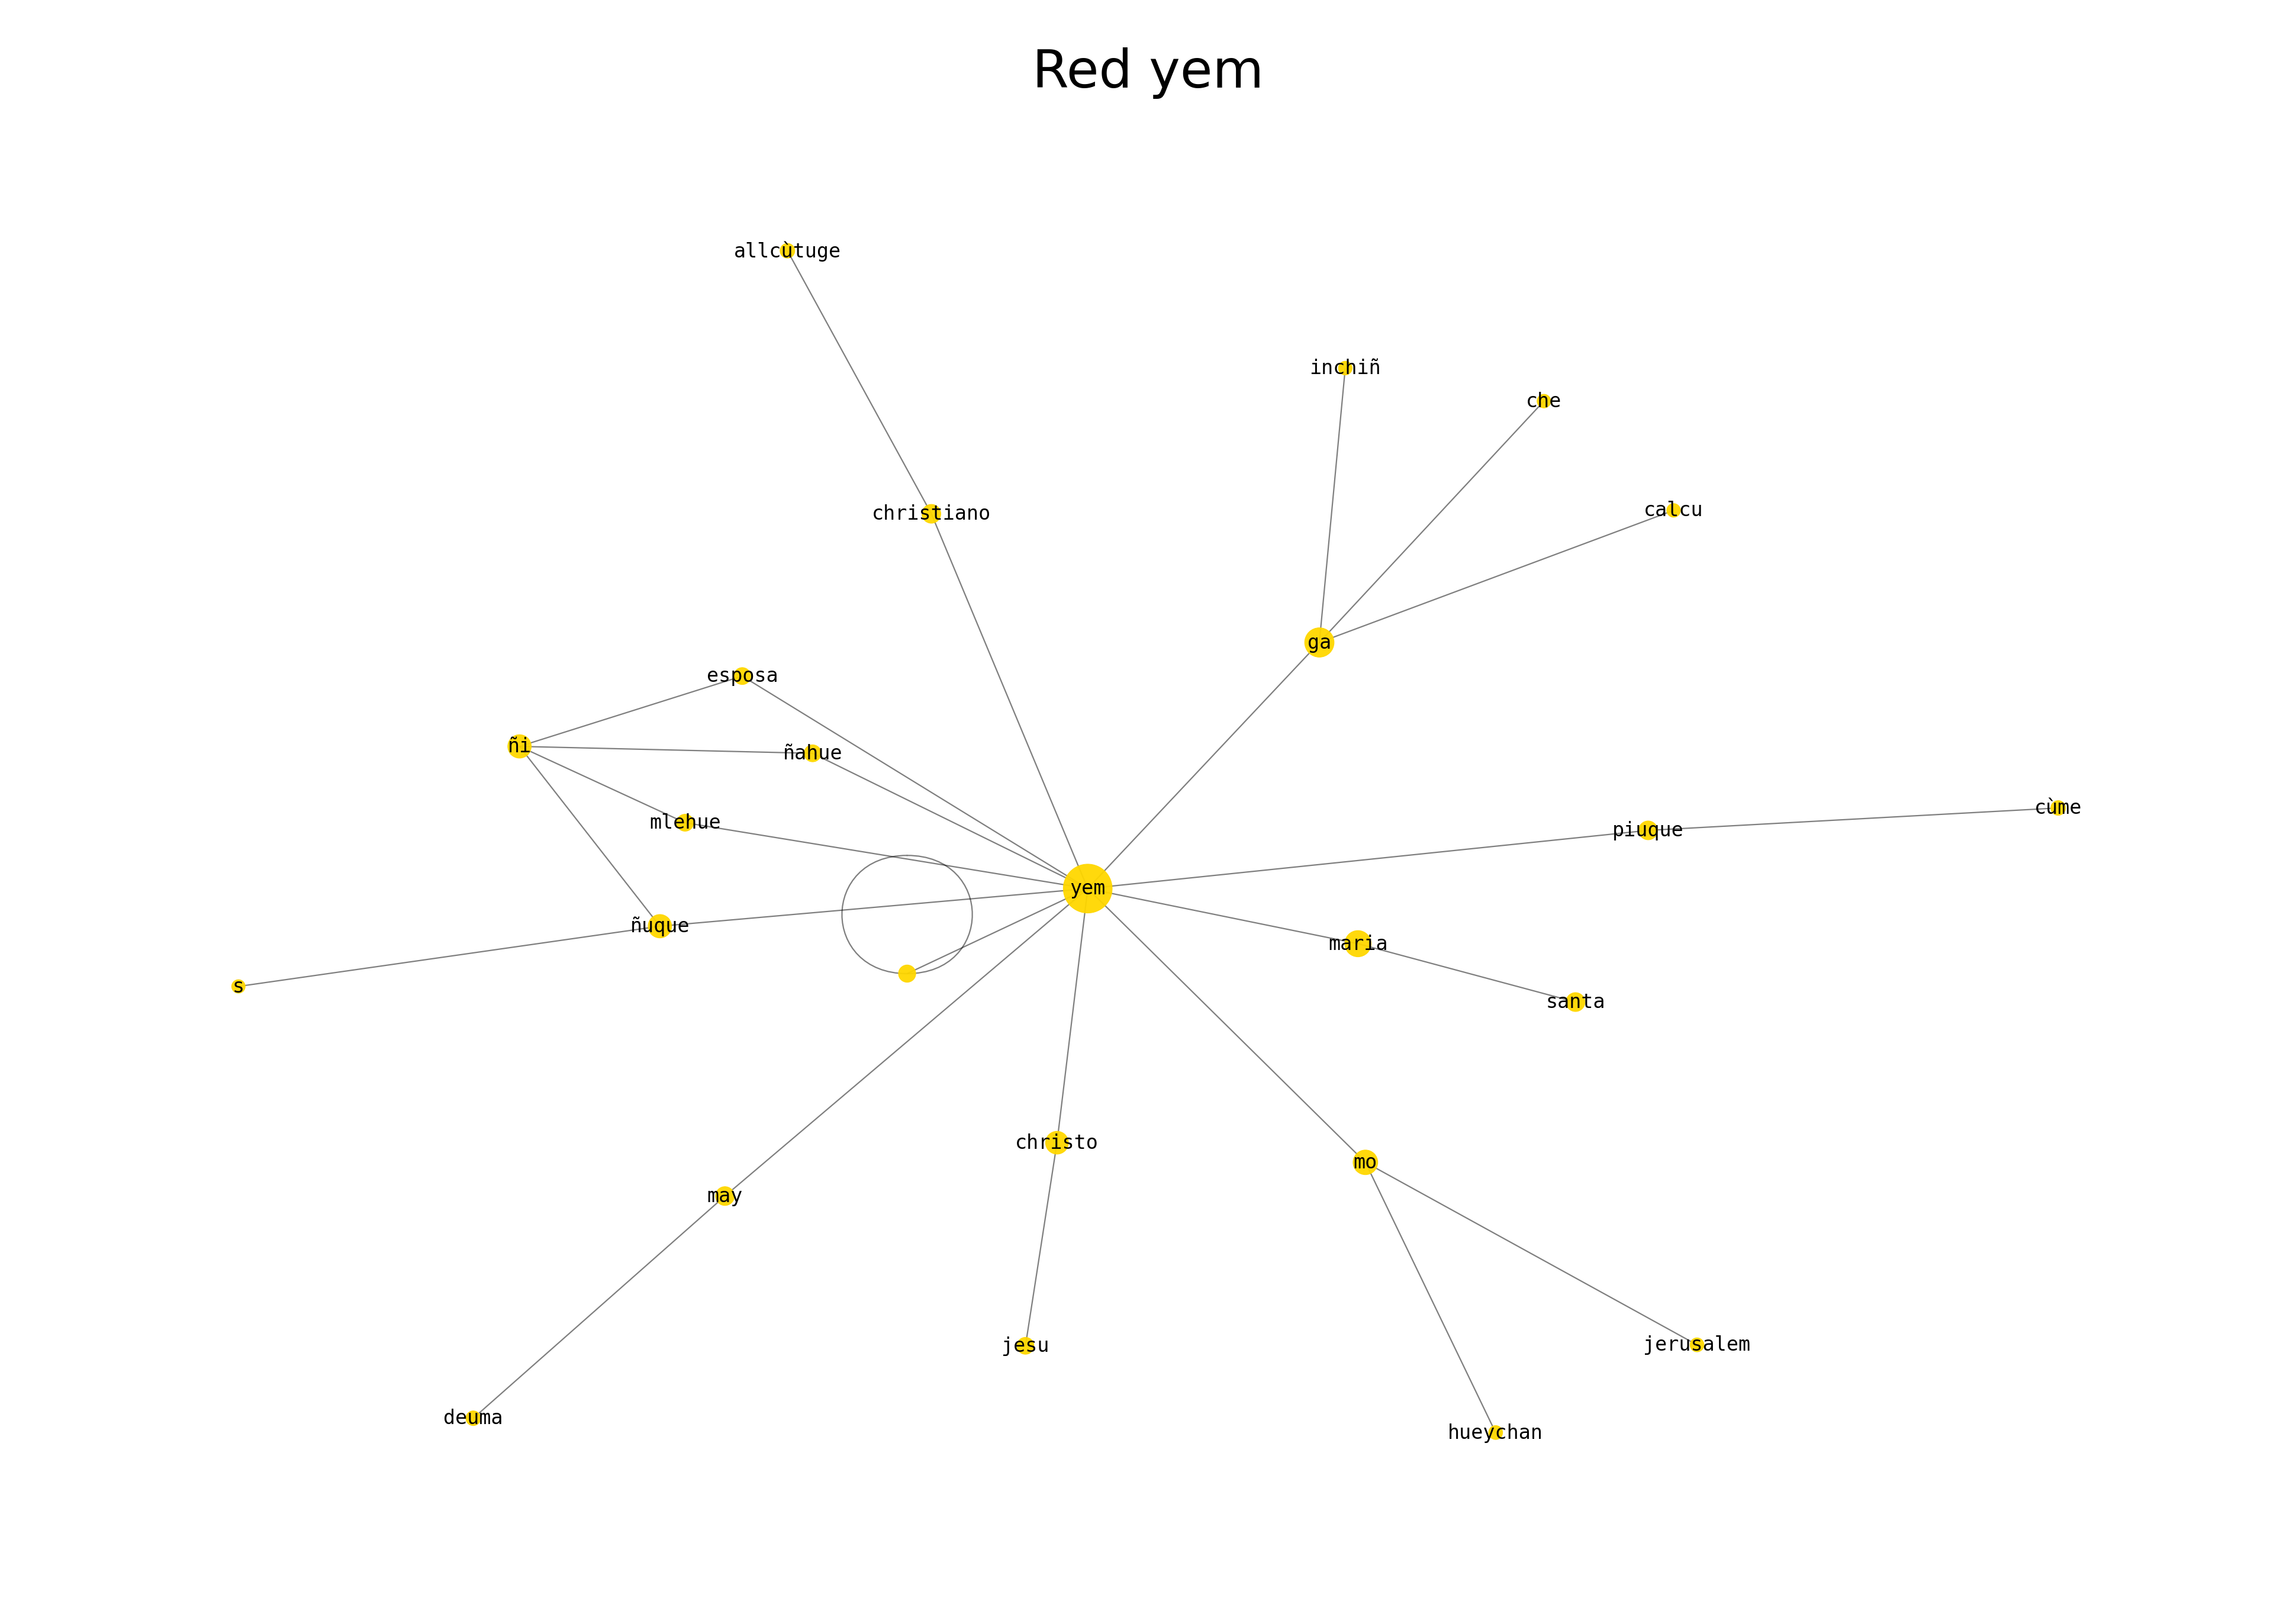

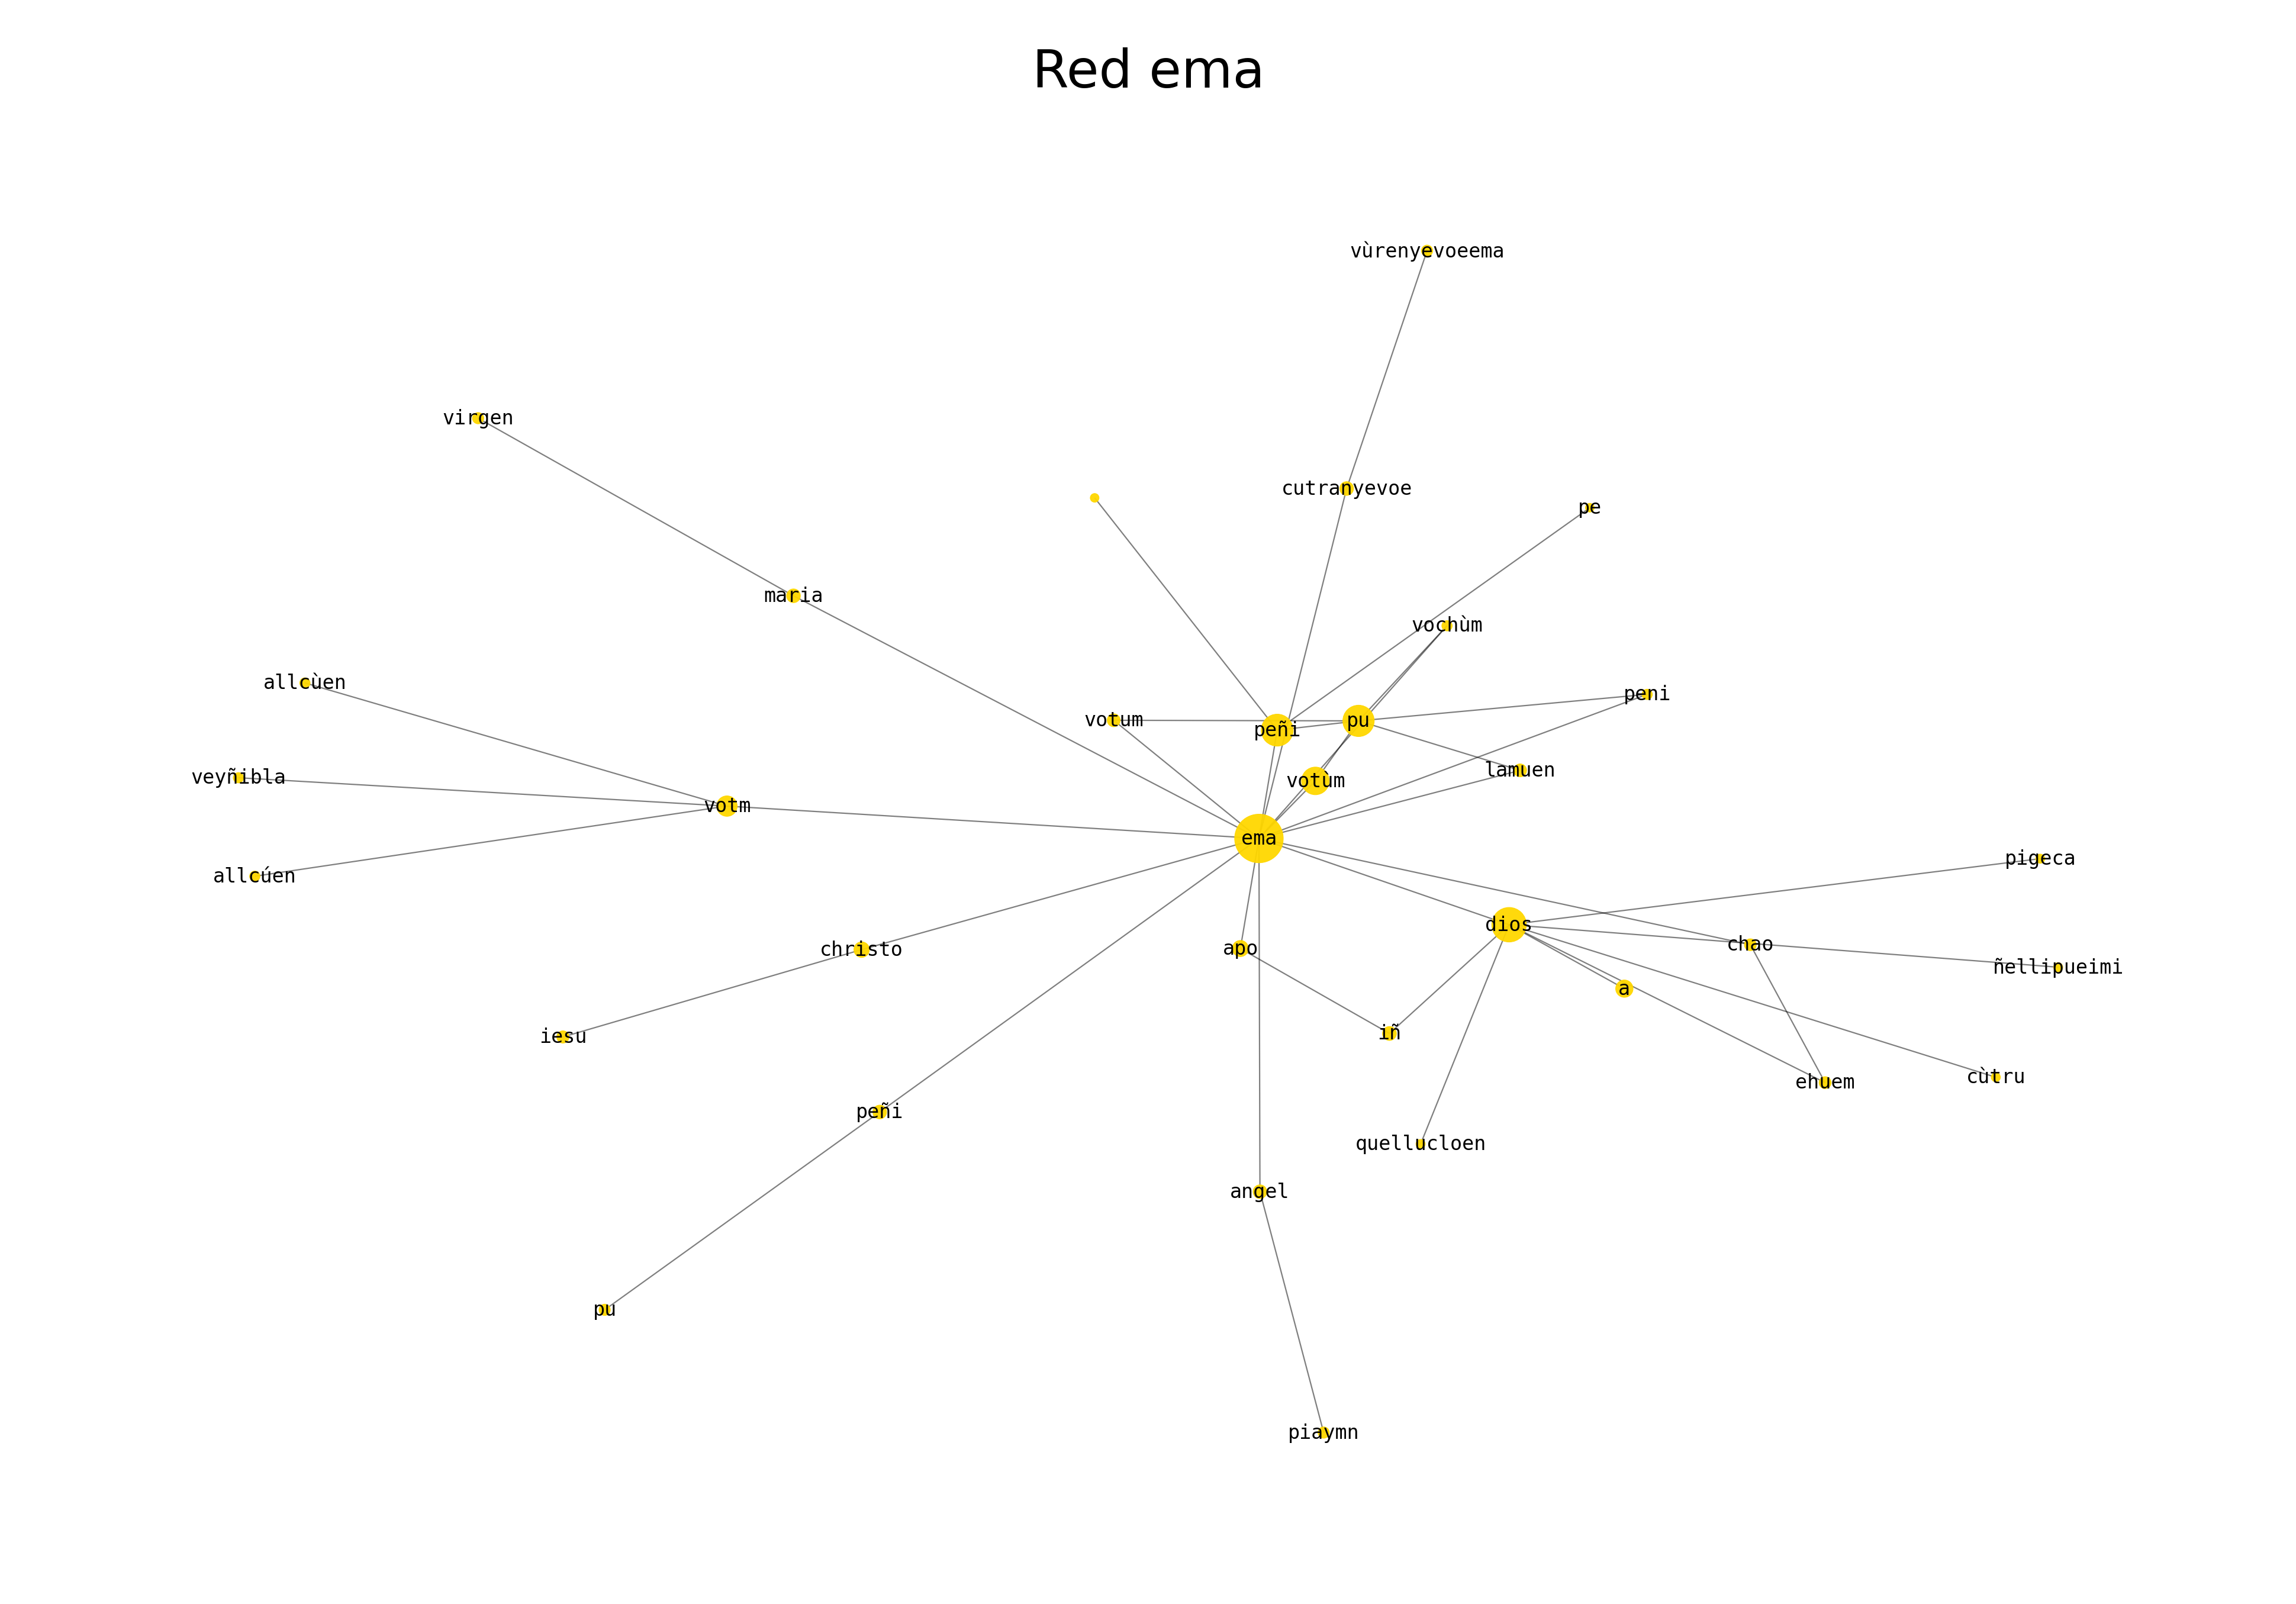

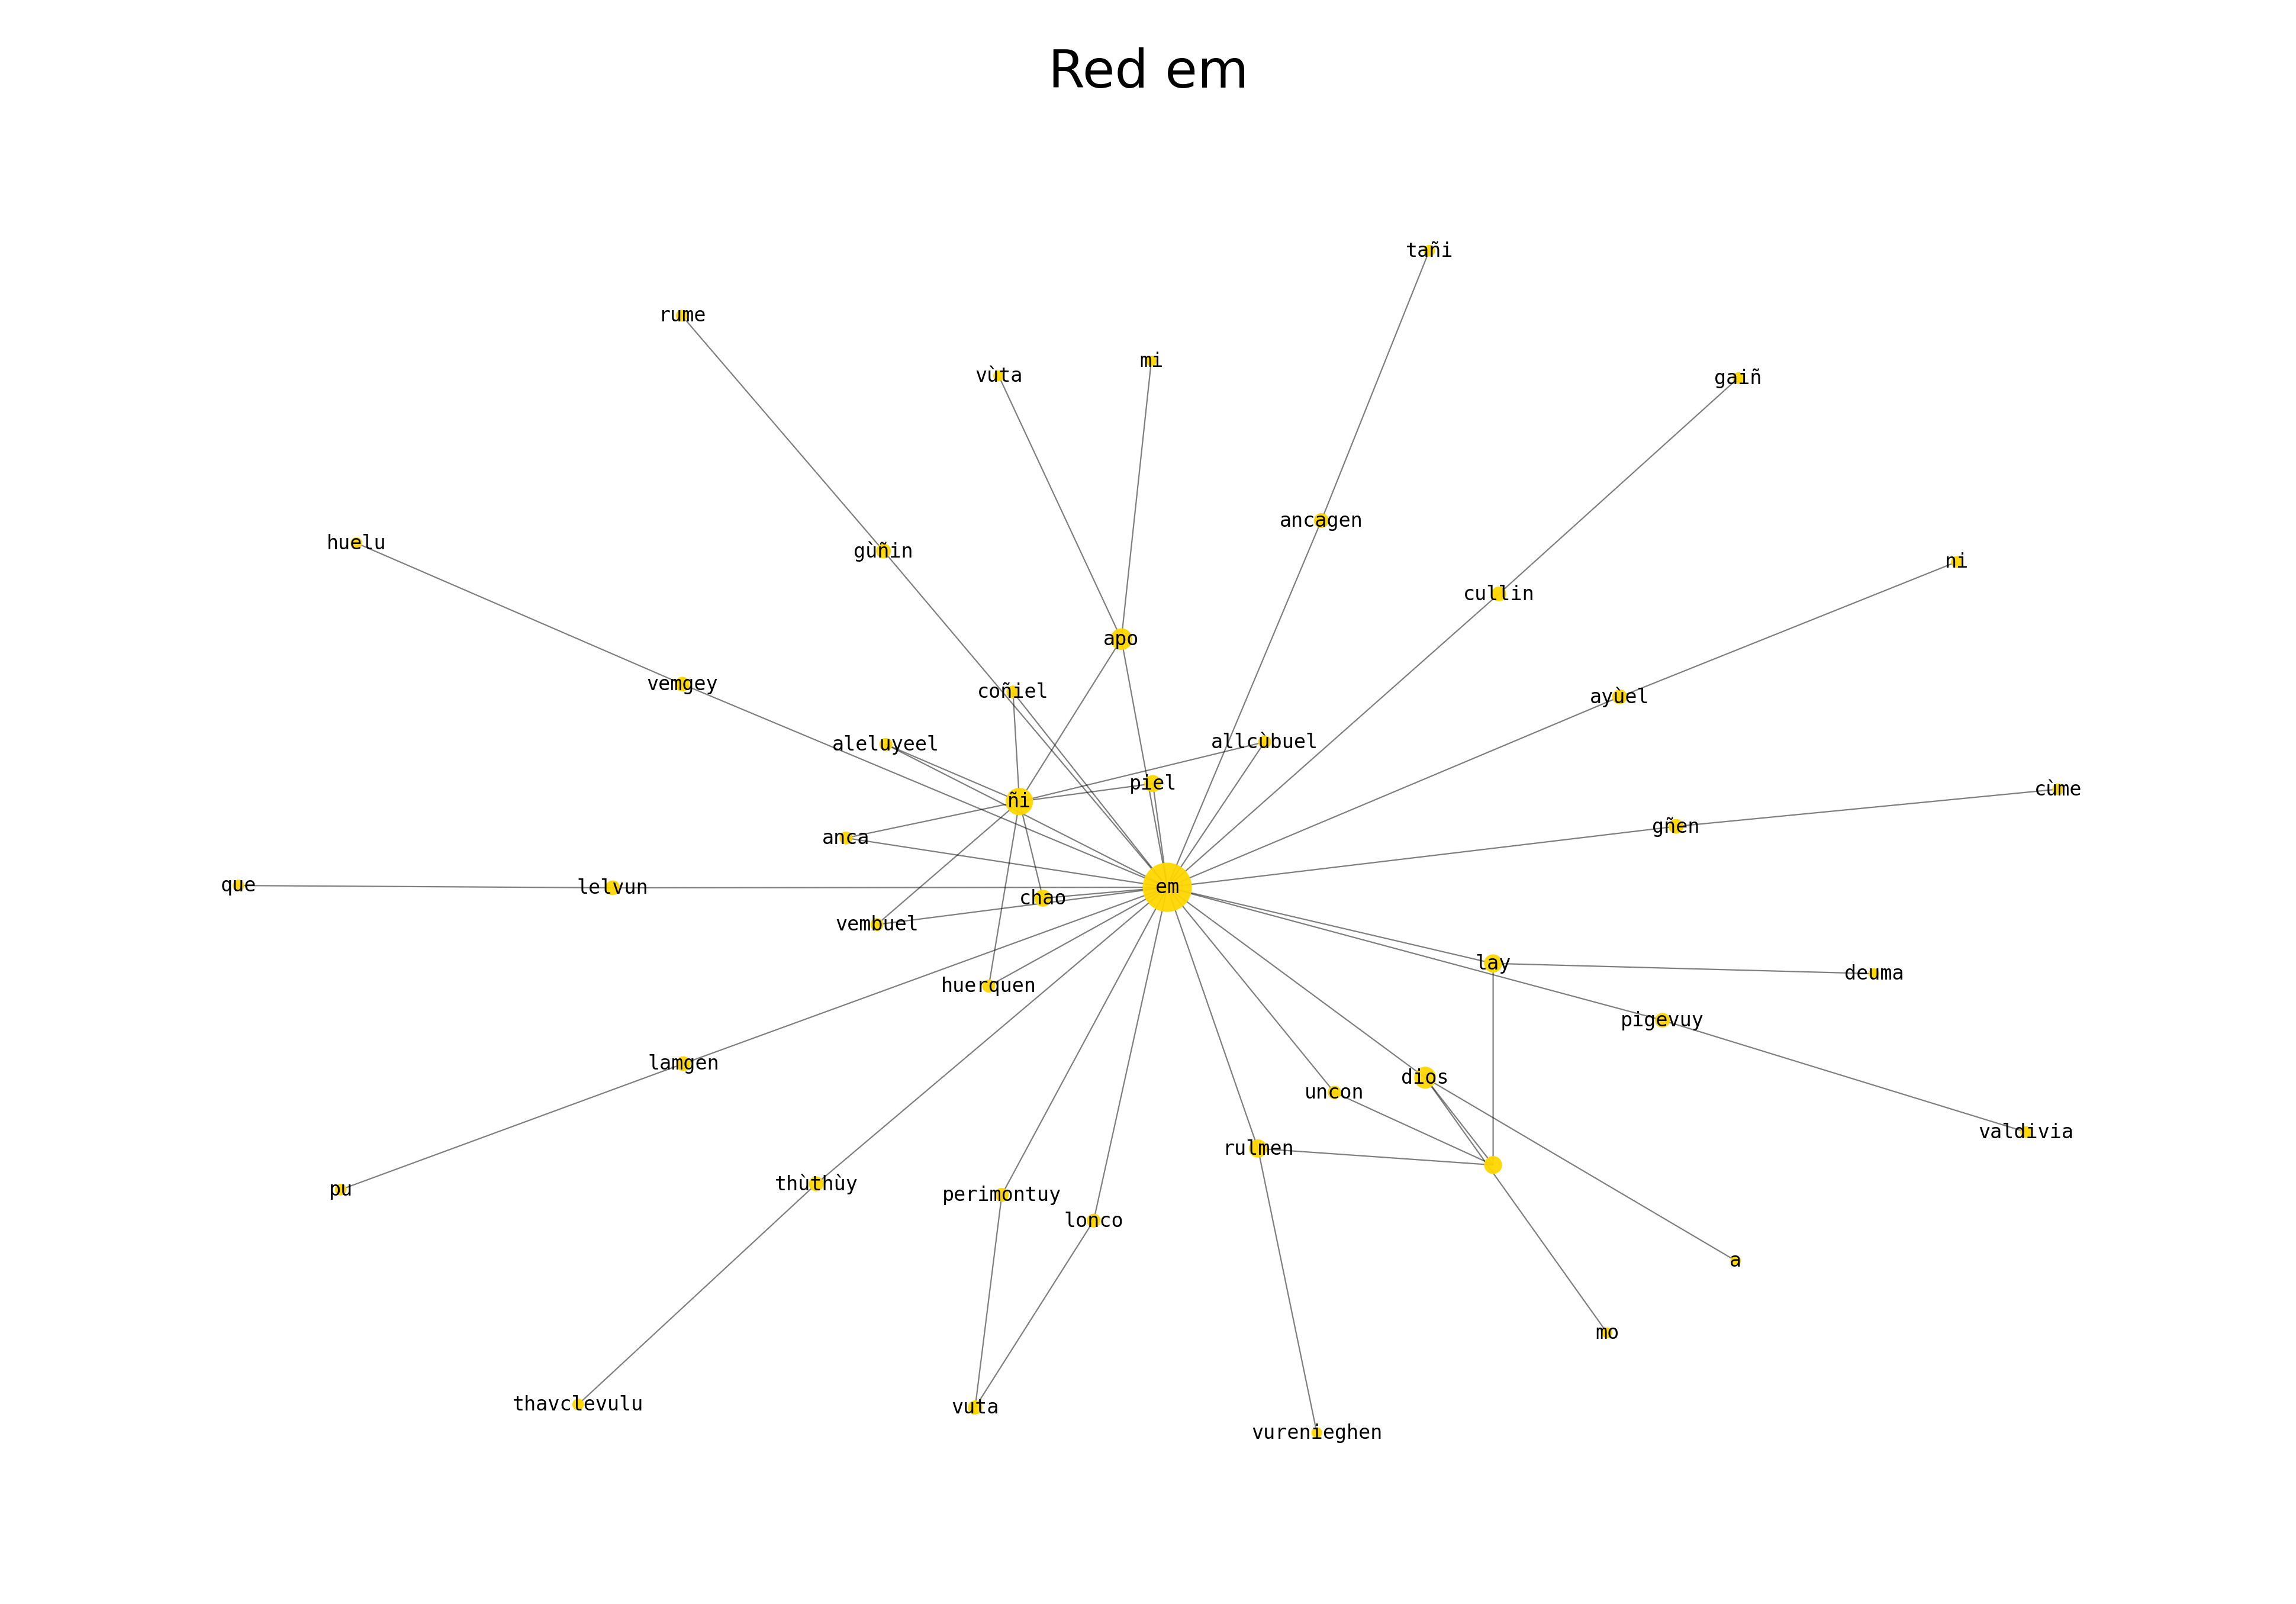

In [17]:
for Y in grafos.keys():
    plotG_centrality(Y,250)

In [18]:
## función para ranquear co-ocurrencias :)

def ranking(palabra,k):
    red = grafos[palabra]
    return list({k: v for k, v in sorted(dict(red[palabra]).items(), key=lambda item: item[1]['weight'],reverse=True)}.keys())[:k]

In [19]:
## palabras más cercanas a -em en el corpus misional

for Y in grafos.keys():
    print(Y,ranking(Y,10))

yem ['maria', 'ga', 'ñuque', 'mo', 'christo', 'may', 'piuque', 'ñahue', 'esposa', 'mlehue']
ema ['peñi', 'dios', 'votùm', 'apo', 'votm', 'votum', 'lamuen', 'christo', 'cutranyevoe', 'maria']
em ['dios', 'apo', 'chao', 'lay', 'rulmen', 'piel', 'perimontuy', 'cullin', 'pigevuy', 'thùthùy']


### Cálculos con el corpus

In [20]:
##Cuantificación

print('Resultados')
print('  ')  

print('Cantidad de oraciones')
print('  ')  
print(len(palabras))
print('  ')  

print('Cantidad de palabras')


tokens = []
for oracion in palabras:
    for palabra in oracion:
        tokens += [palabra]
print(len(tokens))
print('  ')     


print('Cantidad de palabras únicas')


print(len(set(tokens)))
print('  ')     

print('relación')
    

print(len(set(tokens))/len(tokens))
print('  ')     

#contabilizar yem

Yem = {'yem':0,'ema':0,'em':0} 
for key in Yem.keys():
    Yem[key]=tokens.count(key)

print('Cantidad de yem')
 

print(Yem)

Resultados
  
Cantidad de oraciones
  
3738
  
Cantidad de palabras
39906
  
Cantidad de palabras únicas
8029
  
relación
0.2011978148649326
  
Cantidad de yem
{'yem': 19, 'ema': 60, 'em': 33}


In [21]:
diccionario_contextos_presentacion

{'yem': [['deuma', 'may', 'yem'],
  ['cùme', 'piuque', 'yem'],
  ['ñi', 'ñahue', 'yem'],
  ['ñi', 'ñuque', 'yem'],
  ['ñi', 'esposa', 'yem'],
  ['ñi', 'mlehue', 'yem'],
  ['santa', 'maria', 'yem'],
  ['santa', 'maria', 'yem'],
  ['santa', 'maria', 'yem'],
  ['s', 'ñuque', 'yem'],
  ['', '', 'yem'],
  ['jerusalem', 'mo', 'yem'],
  ['hueychan', 'mo', 'yem'],
  ['jesu', 'christo', 'yem'],
  ['jesu', 'christo', 'yem'],
  ['allcùtuge', 'christiano', 'yem'],
  ['calcu', 'ga', 'yem'],
  ['che', 'ga', 'yem'],
  ['inchiñ', 'ga', 'yem']],
 'ema': [['vùrenyevoeema', 'cutranyevoe', 'ema'],
  ['virgen', 'maria', 'ema'],
  ['allcúen', 'votm', 'ema'],
  ['allcùen', 'votm', 'ema'],
  ['veyñibla', 'votm', 'ema'],
  ['a', 'dios', 'ema'],
  ['quellucloen', 'dios', 'ema'],
  ['a', 'dios', 'ema'],
  ['ehuem', 'dios', 'ema'],
  ['ehuem', 'chao', 'ema'],
  ['a', 'dios', 'ema'],
  ['pu', 'peñi', 'ema'],
  ['pu', 'vochùm', 'ema'],
  ['', 'peñi', 'ema'],
  ['pu', 'votùm', 'ema'],
  ['pu', 'votùm', 'ema'],
  ['p

In [ ]:
row = 0
col = 0